In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
FILE = '../src/train.csv'

df = pd.read_csv(FILE)

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [22]:
df.Ticket.sample(10)

21               248698
570         S.W./PP 752
252              113514
883    C.A./SOTON 34068
627               13502
836              315097
25               347077
236               26707
13               347082
831               29106
Name: Ticket, dtype: object

In [5]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
df.describe(include=['O'])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

<AxesSubplot:>

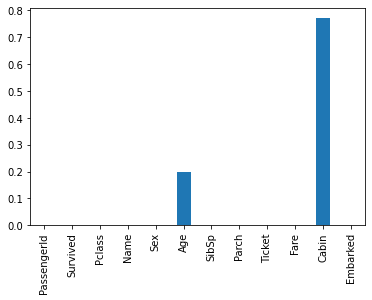

In [10]:
(df.isnull().sum()/df.shape[0]).plot(kind='bar')

In [23]:
df.Name.str.contains('Miss.').sum()

182

In [24]:
# Basic Feature Engineering
df['cabin_encoding'] = df.Cabin.str[0]
df.loc[df.cabin_encoding.isnull(), 'cabin_encoding'] = 'M'

# names
df['isMr'] = df.Name.str.contains('Mr.')
df['isMrs'] = df.Name.str.contains('Mrs.')
df['isMiss'] = df.Name.str.contains('Miss.')

In [25]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked cabin_encoding   isMr  \
0      0         A/5 21171   7.2500   NaN        S              M   True   
1      0          PC 17599  71.2833   C85        C              C   True   
2      0  STON/O2. 3101282   7.9250   NaN        S              M  False   
3      0            113803  53.1000  C123        S              C   True   
4      0            373450   8.0500   NaN        S              M   True   

   isMrs  isMiss  
0  False   False  
1   True   False  
2  False    True  
3   True   False  
4  False   False

In [28]:
feature = ['Survived', 'Pclass', 'Sex', 'Age', 
           'SibSp', 'Parch', 'Fare', 'Embarked', 
           'cabin_encoding', 'isMr', 'isMrs', 'isMiss']
categorical = ['Pclass', 'Sex', 'Embarked', 'cabin_encoding']

In [29]:
df[feature].head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

  cabin_encoding   isMr  isMrs  isMiss  
0              M   True  False   False  
1              C   True   True   False  
2              M  False  False    True  
3              C   True   True   False  
4              M   True  False   False

In [30]:
import os

In [32]:
for i in os.walk('../src'):
    print(i)

('../src', [], ['train.csv', 'test.csv', 'gender_submission.csv'])
